In [53]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
import datetime
from scipy import stats
%matplotlib inline

In [54]:
df_2016 = pd.read_csv('2016_df.csv', parse_dates='Created_Date')
df_2015 = pd.read_csv('2015_df.csv', parse_dates='Created_Date')
df_2014 = pd.read_csv('2014_df.csv', parse_dates='Created_Date')

In [55]:
df_2014['day'] = df_2014.index
df_2015['day'] = df_2015.index
df_2016['day'] = df_2016.index

In [56]:
df_2014 = df_2014.set_index('Created_Date')
df_2015 = df_2015.set_index('Created_Date')
df_2016 = df_2016.set_index('Created_Date')

In [57]:
df_2016 = df_2016.replace(to_replace="-", value=0)

In [58]:
train_years = pd.concat([df_2014, df_2015])

In [59]:
df_weather = pd.get_dummies(train_years['Weather'])

In [60]:
train_years = pd.concat([train_years, df_weather],axis=1,join='inner')

In [61]:
train_years.drop('Weather', axis=1, inplace=True)

In [76]:
feature_cols = ['Building_Conditions', 'General_Request', 
             'Living_Conditions', 'Parking_Enforcement', 
             'Signal_Sign_Repair', 'Street_Sidewalk_Repair',
             'day']

X = train_years[feature_cols]
y = train_years['Max_TempF']

In [77]:
weather_types = ['Fog', 'Fog-Rain', 'Fog-Rain-Snow', 
'Fog-Rain-Thunderstorm', 'Fog-Snow',
'Rain', 'Rain-Snow',
'Rain-Snow-Thunderstorm', 'Rain-Thunderstorm',
'Snow', 'Sunny']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [69]:
y_test_2016 = df_2016.Max_TempF

In [70]:
clf = MultinomialNB()

In [71]:
clf.fit(X,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [72]:
clf.predict(X)

array([33, 24, 19, 21, 30, 35, 20, 20, 33, 33, 35, 28, 35, 35, 35, 35, 35,
       36, 24, 33, 20, 18, 21, 24, 19, 24, 33, 33, 33, 33, 33, 36, 42, 35,
       29, 35, 26, 32, 30, 30, 29, 28, 29, 34, 39, 32, 32, 26, 29, 32, 32,
       32, 90, 88, 32, 32, 29, 29, 29, 43, 43, 35, 29, 29, 35, 45, 88, 42,
       45, 56, 56, 39, 39, 60, 43, 45, 39, 41, 56, 62, 88, 42, 38, 41, 40,
       40, 56, 59, 41, 56, 56, 56, 62, 56, 62, 60, 56, 56, 56, 56, 62, 90,
       77, 62, 56, 41, 41, 42, 75, 65, 56, 56, 56, 56, 66, 70, 75, 56, 41,
       48, 56, 71, 75, 75, 56, 62, 62, 62, 69, 75, 90, 77, 62, 62, 89, 62,
       77, 90, 62, 62, 79, 62, 79, 75, 90, 90, 95, 62, 62, 62, 90, 90, 89,
       82, 82, 82, 77, 90, 90, 85, 62, 71, 71, 89, 90, 90, 89, 92, 95, 89,
       89, 90, 90, 82, 62, 88, 62, 85, 90, 90, 52, 89, 95, 95, 90, 90, 90,
       89, 95, 95, 89, 82, 90, 90, 62, 92, 62, 85, 85, 90, 90, 85, 85, 92,
       92, 85, 90, 90, 82, 85, 69, 69, 78, 90, 90, 82, 71, 69, 82, 69, 90,
       90, 82, 82, 92, 79

In [73]:
df_pred = pd.DataFrame({'pred':clf.predict(X_test),'actual':y_test})

In [74]:
df_pred.sort_index(axis=0, inplace=True)

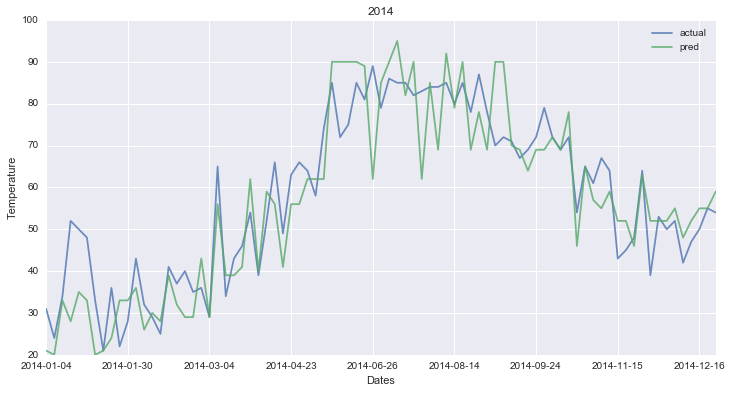

In [75]:
df_pred[pd.to_datetime(df_pred.index).year==2014].plot(kind='line', figsize=(12,6),alpha=.8)
plt.title('2014')
plt.xlabel('Dates')
plt.ylabel('Temperature')